In [1]:
import pandas as pd
from neuralNetworkFromScratch import NeuralNetworkFromScratch
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple multiple classification

In [3]:
data = load_wine()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['class'])
df = pd.concat([features, target], axis=1)

In [4]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [5]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [6]:
n_classes = train_y['class'].nunique()

In [11]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 5,5, 5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5, n_classes], task='multiple_classification', learning_rate=1e-3, n_epochs=10000, print_cost=True)

Cost after iteration 0: 1.9095425048844377
Cost after iteration 1000: 1.9094909742530015
Cost after iteration 2000: 1.9094645085980857
Cost after iteration 3000: 1.9094508960429453
Cost after iteration 4000: 1.909443887023111
Cost after iteration 5000: 1.909440275367302
Cost after iteration 6000: 1.9094384133067748
Cost after iteration 7000: 1.9094374529057223
Cost after iteration 8000: 1.9094369574159729
Cost after iteration 9000: 1.9094367017309526
Cost after iteration 9999: 1.909436569864919


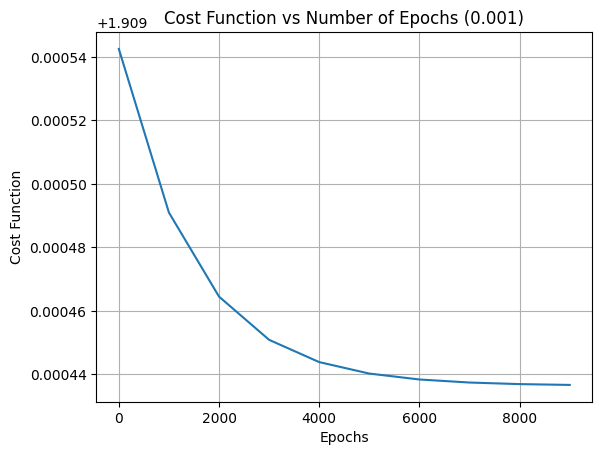

In [13]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [18]:
pred_train = model.predict(train_x, train_y)

Accuracy: 0.36974789915966383


In [19]:
a = model.predict(test_x, test_y)

Accuracy: 0.4406779661016949


In [31]:
Z = np.random.uniform(0,1e1, [3,10])

In [32]:
# softmax
sum_exp = np.exp(Z).sum(axis=0)
A = np.exp(Z) / sum_exp
A

array([[4.31537352e-01, 2.23493181e-02, 9.00776521e-02, 9.85287795e-01,
        4.89966299e-03, 2.28418980e-01, 6.66496901e-03, 4.40367488e-03,
        8.16739305e-01, 1.44975048e-02],
       [5.83706122e-04, 2.13550393e-02, 7.49691199e-01, 1.44200877e-02,
        3.83548501e-01, 2.50276955e-02, 9.93117301e-01, 2.09719463e-01,
        1.14147613e-04, 5.08545161e-01],
       [5.67878942e-01, 9.56295643e-01, 1.60231149e-01, 2.92116871e-04,
        6.11551836e-01, 7.46553324e-01, 2.17729678e-04, 7.85876862e-01,
        1.83146547e-01, 4.76957334e-01]])

In [59]:
output = []
for col in range(0, A.shape[1]):
    out_class = np.where(A[:,col] == max(A[:,col]))[0]
    output.append(out_class)
np.array(output)

array([[2],
       [2],
       [1],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [1]], dtype=int64)

In [12]:
AL = np.random.uniform(0,1,[3,119])
Y = np.round((np.random.uniform(0,1,[3,119])),0)
m = Y.shape[1]

In [13]:
cost = (1. / m) * (-Y* np.log(AL) - (1 - Y)* np.log(1 - AL))

3.0731787261176366